In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
drugdata_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
complete_df = pd.merge(drugdata_df, mouse_df, how='outer', on='Mouse ID')

# Display the data table for preview
complete_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = complete_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean)
# Preview DataFrame
tumor_mean_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stderror = complete_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tumor_stderror_df = pd.DataFrame(tumor_stderror)
# Preview DataFrame

tumor_stderror_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_reformat = tumor_mean_df.reset_index()
mean_pivot = mean_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
error_reformat = tumor_stderror_df.reset_index()
error_pivot = error_reformat.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


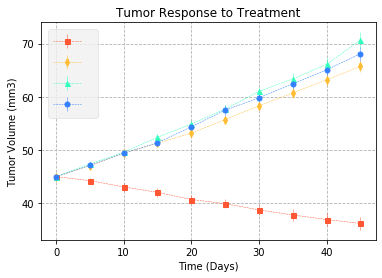

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

caperr= plt.errorbar(mean_pivot.index, mean_pivot["Capomulin"], yerr=error_pivot["Capomulin"],\
             color="#FF5733", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
infuerr= plt.errorbar(mean_pivot.index, mean_pivot["Infubinol"], yerr=error_pivot["Infubinol"],\
             color="#FFBD33", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
ketaerr= plt.errorbar(mean_pivot.index, mean_pivot["Ketapril"],yerr=error_pivot["Ketapril"],\
             color="#33FFBD", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
placerr= plt.errorbar(mean_pivot.index, mean_pivot["Placebo"],yerr=error_pivot["Placebo"],\
             color="#3380FF", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)") 
plt.ylabel("Tumor Volume (mm3)") 

plt.style.use('fivethirtyeight')
plt.grid(linestyle="dashed")
plt.grid(True)

#legend
plt.legend(handles=[caperr,infuerr,ketaerr,placerr],loc="best")

# Save the figure
plt.savefig("TumerResponsetoTreatment.png")

# Show the plot
plt.show()



## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_mean = complete_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
metastic_mean_df = pd.DataFrame(metastic_mean)
# Preview DataFrame
metastic_mean_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastic_stderror = complete_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
metastic_stderror_df = pd.DataFrame(metastic_stderror)
# Preview DataFrame
metastic_stderror_df.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [9]:
# Minor Data Munging to Re-Format the Data Frames
metastic_mean_reformat = metastic_mean_df.reset_index()
metastic_mean_pivot = metastic_mean_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

metastic_error_reformat = metastic_stderror_df.reset_index()
metastic_error_pivot = metastic_error_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
mean_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


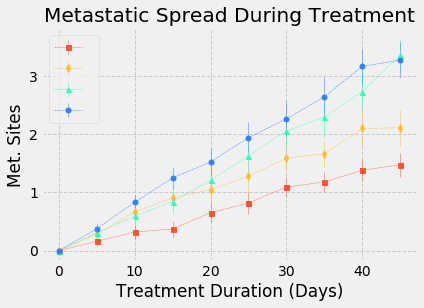

In [10]:
# Generate the Plot (with Error Bars)
caperr2=plt.errorbar(metastic_mean_pivot.index, metastic_mean_pivot["Capomulin"], yerr=metastic_error_pivot["Capomulin"],\
             color="#FF5733", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
infuerr2=plt.errorbar(metastic_mean_pivot.index, metastic_mean_pivot["Infubinol"], yerr=metastic_error_pivot["Infubinol"],\
             color="#FFBD33", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)
ketaerr2=plt.errorbar(metastic_mean_pivot.index, metastic_mean_pivot["Ketapril"],yerr=metastic_error_pivot["Ketapril"],\
             color="#33FFBD", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
placerr2=plt.errorbar(metastic_mean_pivot.index, metastic_mean_pivot["Placebo"],yerr=metastic_error_pivot["Placebo"],\
             color="#3380FF", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)

# Save the Figure
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites') 

plt.legend(handles=[caperr2,infuerr2,ketaerr2,placerr2],loc="best")

plt.style.use('fivethirtyeight')
plt.grid(linestyle="dashed")
plt.grid(True)

plt.savefig("MetasticSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = complete_df.groupby(["Drug", "Timepoint"]).count()['Mouse ID']
# Convert to DataFrame
mice_df = pd.DataFrame({"Viable Mice": mice})

# Preview DataFrame
mice_df.head(10)

Viable Mice
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21

In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat = mice_df.reset_index()
mice_pivot = mice_reformat.pivot(index='Timepoint', columns='Drug')['Viable Mice']

# Preview the Data Frame
mice_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


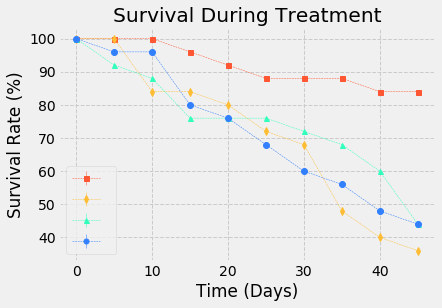

In [13]:
# Generate the Plot (Accounting for percentages)
capmice=plt.plot(100 * mice_pivot["Capomulin"] / 25, color="#FF5733", marker="s", linestyle="dashed", markersize=5, linewidth=0.50)
infumice=plt.plot(100 * mice_pivot["Infubinol"] / 25,  color="#FFBD33", marker="d", linestyle="dashed", markersize=5, linewidth=0.50)
ketamice=plt.plot(100 * mice_pivot["Ketapril"] / 25, color="#33FFBD", marker="^", linestyle="dashed", markersize=5, linewidth=0.50)
placmice=plt.plot(100 * mice_pivot["Placebo"] / 25 ,  color="#3380FF", marker="o", linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival During Treatment") 
plt.ylabel("Survival Rate (%)") 
plt.xlabel("Time (Days)") 
plt.grid(True)

plt.style.use('fivethirtyeight')
plt.grid(linestyle="dashed")
plt.grid(True)

#legend
plt.legend(handles=[caperr2,infuerr2,ketaerr2,placerr2],loc="best")
# Save the Figure
plt.savefig("MiceSurvival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
drug_change =  100 * (mean_pivot.iloc[-1] - mean_pivot.iloc[0]) / mean_pivot.iloc[0]
drug_change_sem =  100 * (error_pivot.iloc[-1] - error_pivot.iloc[0]) / error_pivot.iloc[0]
# Display the data to confirm
drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

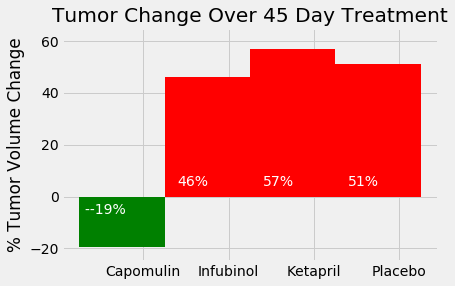

In [15]:
# Store all Relevant Percent Changes into a Tuple
changes = (drug_change["Capomulin"], 
               drug_change["Infubinol"], 
               drug_change["Ketapril"], 
               drug_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(changes))  
width = 1
rectsPass = ax.bar(ind[0], changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'),horizontalalignment="center")
ax.set_ylim([-25,65])
ax.set_xticks(ind + 0.25)

plt.style.use('fivethirtyeight')
plt.grid(True)


# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/3., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls

autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("SummaryTumorChange.png")

# Show the Figure
fig.show()

Prompt: Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

When looking at the line graph on tumor response to treatment it was clear that Campomulin had the greatest tumor volume decrease amongst all of the treatments. While the Campomulin treatment was decreasing the remaining treatments were increasing in tumor volume. 

The line graph on metastatic spread during treatment showed that the placebo had the greatest spread among all of the treatments. This indicates that all of the treatments have a positive impact on decreasing metastatic spread in the rat sample. 

When looking at the bar chart on tumor change over the 45 day treatment it was evident that Campomulin was the most effective treatment. This is because the negative 19% indicated that there was a 19% reduction in tumor growth. The remaining treatments actually resulted in an increase in tumor growth 
